In [116]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rc('font', size=20)
matplotlib.rc('axes', titlesize=20)

In [117]:
def import_plot_data(path, N = 1599999, M=50):
    data=pd.read_csv(path)
    data = data[data['Step'] < N ]
    data = data.groupby(data.index // M).min()
    return data

In [123]:
path_fp = 'plot_data/circles/eval/run-fp_1e-3-tag-eval_loss_epoch (1).csv'
path_vanilla = 'plot_data/circles/eval/run-vanilla-tag-eval_loss_epoch.csv'
path_potential = 'plot_data/circles/eval/run-potential-tag-eval_loss_epoch (1).csv'
loss_fp=import_plot_data(path_fp)
loss_vanilla=import_plot_data(path_vanilla)
loss_potential=import_plot_data(path_potential)


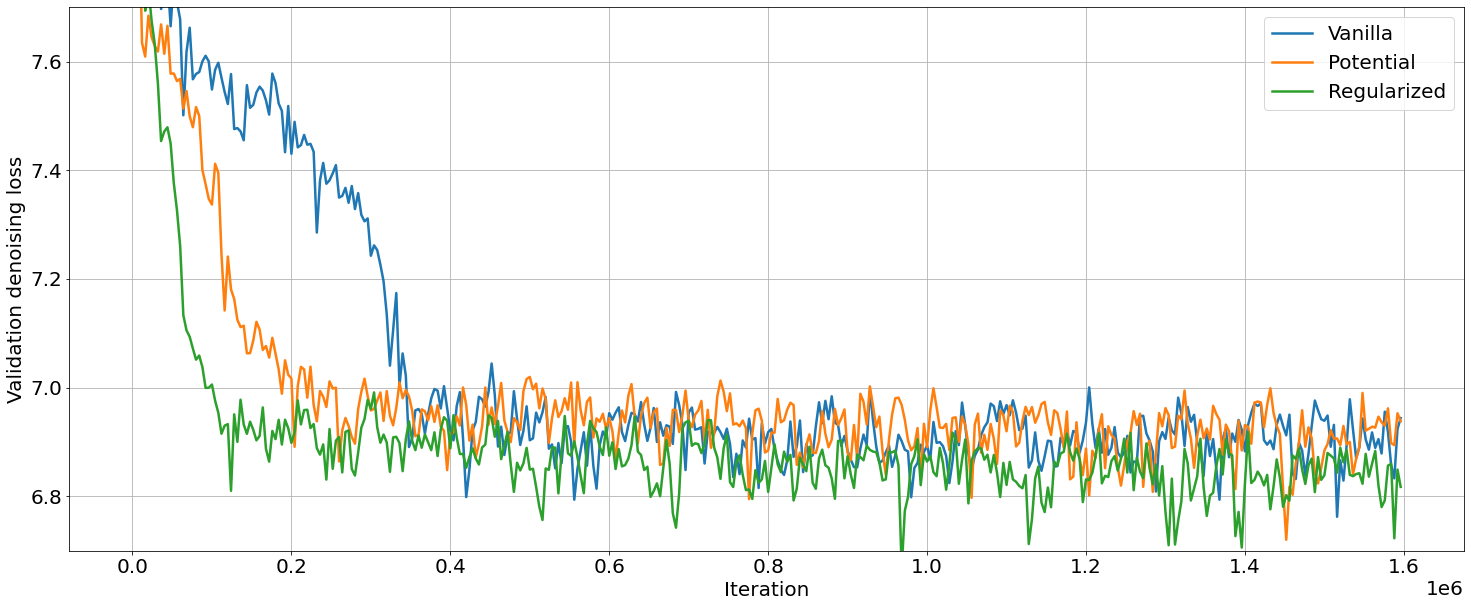

In [125]:
plt.figure(figsize=(25,10))
plt.plot(loss_vanilla['Step'], loss_vanilla['Value'].ewm(com=0.6).mean(), label='Vanilla', linewidth=2.5)
plt.plot(loss_potential['Step'] ,loss_potential['Value'].ewm(com=0.6).mean(), label='Potential', linewidth=2.5)
plt.plot(loss_fp['Step'], loss_fp['Value'].ewm(com=0.6).mean(), label='Regularized', linewidth=2.5)
plt.ylim(6.7, 7.7)
plt.xlabel('Iteration')
plt.ylabel('Validation denoising loss')
plt.legend()
plt.grid()
#plt.gca().set_facecolor('white')
plt.savefig('figures/plots/eval_loss', dpi=300, facecolor='white')

In [126]:
path_fp = 'plot_data/circles/fp/run-fp_1e-3-tag-train_fokker_planck_loss_epoch.csv'
path_potential = 'plot_data/circles/fp/run-potential-tag-train_fokker_planck_loss_epoch.csv'
loss_fp=import_plot_data(path_fp)
loss_potential=import_plot_data(path_potential)


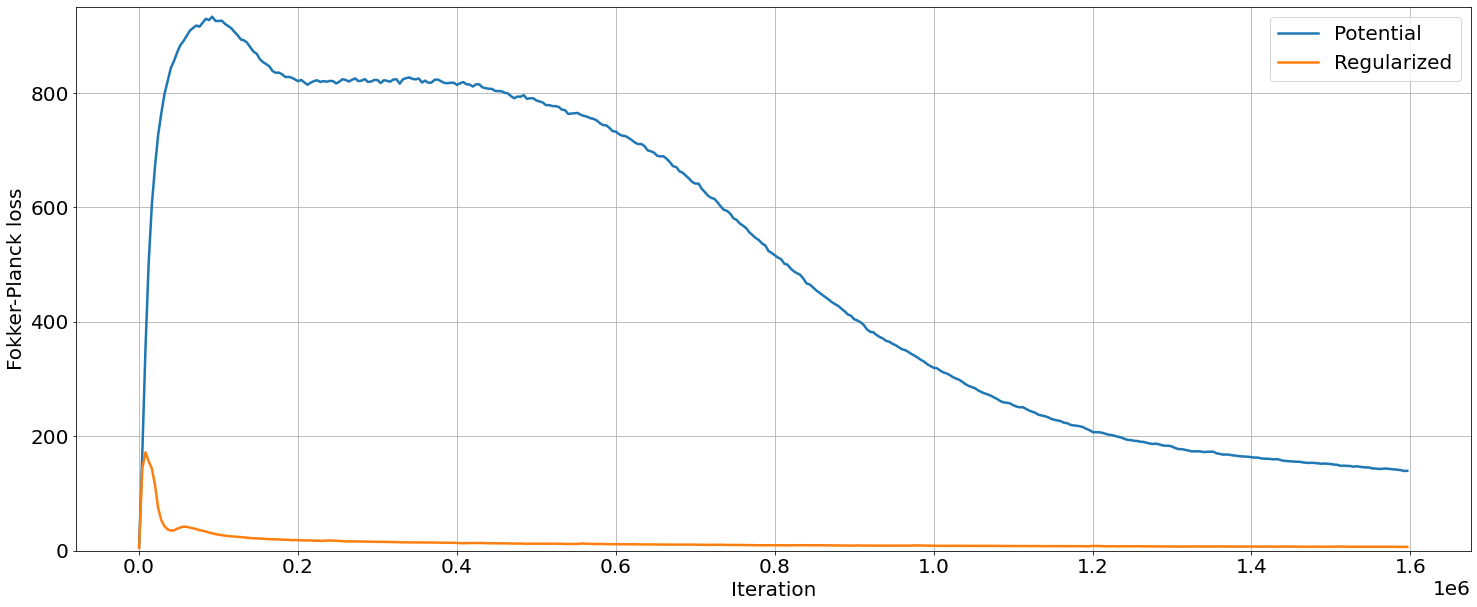

In [127]:
plt.figure(figsize=(25,10))
plt.plot(loss_potential['Step'] ,loss_potential['Value'].ewm(com=0.6).mean(), label='Potential', linewidth=2.5)
plt.plot(loss_fp['Step'], loss_fp['Value'].ewm(com=0.6).mean(), label='Regularized', linewidth=2.5)
plt.ylim(0, 950)
plt.xlabel('Iteration')
plt.ylabel('Fokker-Planck loss')
plt.legend()
plt.grid()
plt.savefig('figures/plots/fp_loss', dpi=300, facecolor='white')